            Passengers
1949-01-01       112.0
1949-02-01       118.0
1949-03-01       132.0
1949-04-01       129.0
1949-05-01       121.0
...                ...
1960-08-01       606.0
1960-09-01       508.0
1960-10-01       461.0
1960-11-01       390.0
1960-12-01       432.0

[144 rows x 1 columns]


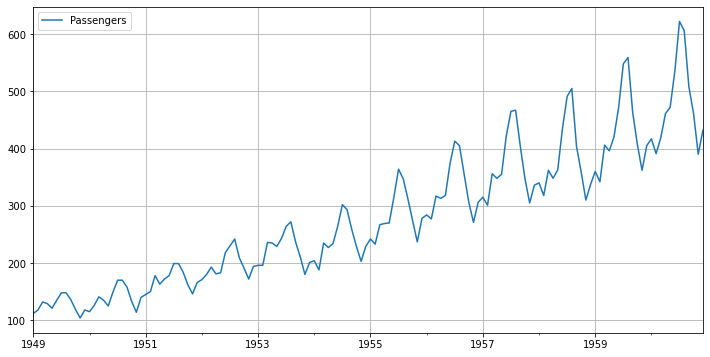

In [93]:

import pandas as pd
import matplotlib.pyplot as plt
Airp = pd.read_csv("D:/pyproj/datasource/data/AirPassengers.csv",index_col="Month")
Airp = Airp.astype("float",copy=False)
Airp.index = pd.date_range(start=Airp.index.values[0],periods=Airp.shape[0],freq="MS")
print(Airp)
Airp.plot(kind="line",figsize=(12,6))
plt.grid("on")
plt.show()



In [94]:
#Check white noise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
lags = [4,8,12,16,20,24,28,32,36,64,128]
LB = sm.stats.diagnostic.acorr_ljungbox(Airp,lags=lags)
LB = pd.DataFrame(data=np.array(LB).T,columns=["LBvalue","P-values"])
LB["lags"] = lags
print(LB)



        LBvalue       P-values  lags
0    427.738684   2.817731e-91     4
1    709.484498  6.496271e-148     8
2   1036.481907  2.682212e-214    12
3   1289.037076  1.137910e-264    16
4   1434.148907  5.300473e-292    20
5   1606.083817   0.000000e+00    24
6   1732.279706   0.000000e+00    28
7   1792.523003   0.000000e+00    32
8   1866.625062   0.000000e+00    36
9   1960.328857   0.000000e+00    64
10  5085.231448   0.000000e+00   128


D:\App\Anaconda3\envs\ML\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


In [95]:
dftest = sm.tsa.adfuller(Airp.Passengers,autolag='BIC')
print(dftest)

(0.815368879206063, 0.9918802434376413, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 1039.5901169044441)


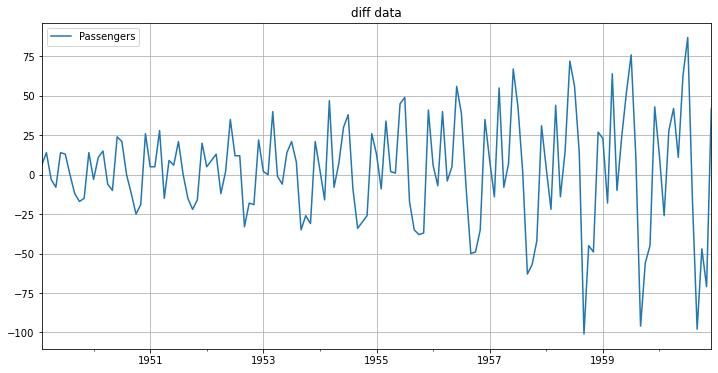

In [96]:
#First difference
datadiff = Airp.diff().dropna()
datadiff.plot(kind="line",figsize=(12,6))
plt.grid("on")
plt.title("diff data")
plt.show()

In [97]:
lags = [4,8,12,16,20,24,28,32,36,64,128]
LB = sm.stats.diagnostic.acorr_ljungbox(datadiff,lags=lags)
LB = pd.DataFrame(data=np.array(LB).T,columns=["LBvalue","P-value"])
LB["lags"] = lags
print("white noise test after first diff",LB)
print(("----------------------------------"))
dftest = sm.tsa.adfuller(datadiff.Passengers,autolag='AIC')
print("adf:",dftest[0])
print("pvalue:",dftest[1])
print("usedlag:",dftest[2])

#SO we can draw the conclusion that ARIMA i=1




white noise test after first diff        LBvalue       P-value  lags
0    37.010908  1.792006e-07     4
1    53.920949  7.151547e-09     8
2   182.727561  1.175064e-32    12
3   214.146094  1.079352e-36    16
4   231.758539  5.312981e-38    20
5   334.364925  1.891849e-56    24
6   360.007662  2.410279e-59    28
7   373.697929  6.990570e-60    32
8   451.192427  3.267677e-73    36
9   627.529174  1.813356e-93    64
10  786.158482  3.299722e-95   128
----------------------------------
adf: -2.82926682416999
pvalue: 0.054213290283826786
usedlag: 12


D:\App\Anaconda3\envs\ML\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


D:\App\Anaconda3\envs\ML\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


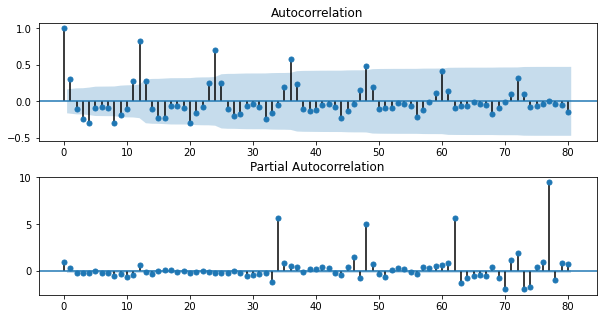

In [98]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datadiff,lags=80,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datadiff,lags=80,ax=ax2)
plt.subplots_adjust(hspace=0.3)
plt.show()



In [99]:
pmax = 12
qmax = 15
bic_matrix = []

for p in range(1,pmax+1):
    tmp = []
    for q in range(1,qmax+1):
        try:
            tmp.append(sm.tsa.ARIMA(Airp,(p,1,q)).fit().bic)

        except:
            tmp.append(None)
    bic_matrix.append(tmp)
print("The iter of model is over")





D:\App\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
D:\App\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
D:\App\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
D:\App\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
D:\App\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params av

The iter of model is over


In [100]:
bic_matrix = pd.DataFrame(bic_matrix)
print(bic_matrix)


              0            1            2            3            4  \
0   1413.996778  1386.629597  1390.852770  1379.906514  1370.695543   
1   1376.510031  1361.820473  1364.018127  1362.287585  1367.248048   
2   1380.228073  1381.489517  1360.478380  1367.246414  1371.387508   
3   1382.455180  1379.853649          NaN  1362.583444  1365.123188   
4   1387.256400  1384.739884  1375.248865  1375.791064  1370.901168   
5   1374.573299          NaN  1375.627965  1370.107749  1358.041942   
6   1369.938308          NaN          NaN          NaN  1343.448482   
7   1338.670392          NaN  1325.045490          NaN          NaN   
8   1350.705200  1349.672943          NaN          NaN          NaN   
9           NaN          NaN          NaN          NaN          NaN   
10          NaN          NaN          NaN          NaN          NaN   
11          NaN          NaN          NaN          NaN          NaN   

              5            6            7            8            9  \
0   1

In [102]:
p,q = bic_matrix.astype(float).stack().idxmin()
print("The best p:",p)
print("The best q:",q)


The best p: 4
The best q: 8


D:\App\Anaconda3\envs\ML\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


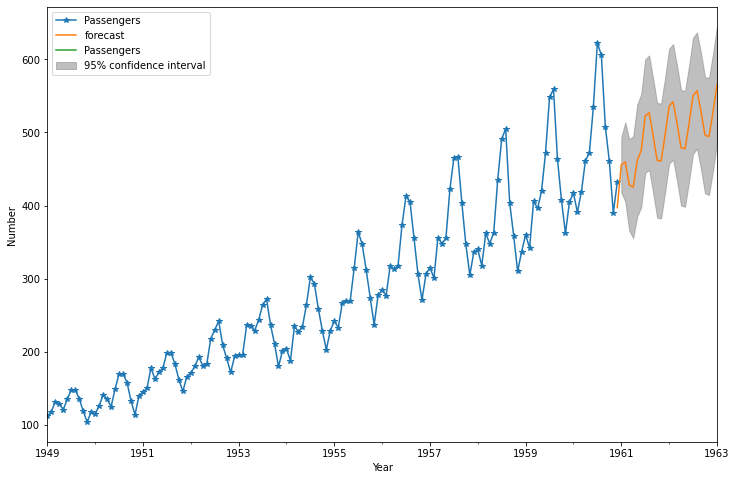

In [103]:
Model = sm.tsa.ARIMA(Airp,order=(4,1,8)).fit()
fig,ax = plt.subplots(figsize=(12,8))
ax = Airp.plot(ax=ax,marker="*")
fig = Model.plot_predict(start=143,end=168,dynamic=True,ax=ax,plot_insample=True)
plt.xlabel("Year")
plt.ylabel("Number")
plt.legend()
plt.show()